###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, I. Hawke. Partly based on content by David Ketcheson, also under CC-BY.

# Full phugoid model

This is the third Jupyter Notebook of the series on the _phugoid model of glider flight_, our first learning module of the course ["Practical Numerical Methods with Python"](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about). In the [first notebook](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_01_Phugoid_Theory.ipynb), we described the physics of the trajectories known as phugoids obtained from an exchange of potential and kinetic energy in an idealized motion with no drag. We gave you a neat little code to play with and plot various phugoid curves.

In the second notebook, we looked at the equation representing small perturbations on the straight-line phugoid, resulting in simple harmonic motion. This is a second-order ordinary differential equation, and we solved it numerically using **Euler's method**: the simplest numerical method of all. We learned about convergence and calculated the error of the numerical solution, comparing with an analytical solution. That is a good foundation!

Now, let's go back to the dynamical model, and take away the idealization of no-drag. Let's remind ourselves of the forces affecting an aircraft, considering now that it may be accelerating, with an instantaneous upward trajectory. We use the designation $\theta$ for the angle, and consider it positive upwards.

![Image](./figures/glider_forces-lesson3.png)
#### Figure 1. Forces with a positive trajectory angle.

In Figure 1, $L$ is the lift, $W$ is the weight, $D$ is the drag, and $\theta$ the positive angle of the trajectory, instantaneously. 

In [Lesson 1](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_01_Phugoid_Theory.ipynb), we wrote the force balance in the directions perpendicular and parallel to the trajectory for a glider in _equilibrium_. What if the forces are _not_ in balance? Well, there will be acceleration terms in the equations of motion, and we would have in that case:

$$
\begin{align}
m \frac{dv}{dt} & = - W \sin\theta - D \\
m v \, \frac{d\theta}{dt} & = - W \cos\theta + L
\end{align}
$$

We can use a few little tricks to make these equations more pleasing. First, use primes to denote the time derivatives and divide through by the weight:

$$
\begin{align}
 \frac{v'}{g} & = - \sin\theta - D/W \\
\frac{v}{g} \, \theta' & = - \cos\theta + L/W
\end{align}
$$

Recall, from our first lesson, that the ratio of lift to weight is known from the trim conditions—$L/W=v^2/v_t^2$— and also from the definitions of lift and drag, 

$$
\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}
$$

we see that $L/D=C_L/C_D$. The system of equations can be re-written:

$$
\begin{align}
v' & = - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\
\theta' & = - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v
\end{align}
$$

It is very interesting that the first equation has the factor $C_D/C_L$, which is the inverse of a measure of the aerodynamic efficiency of the aircraft. It turns out, this is the term that contributes damping to the phugoid model: if drag is zero, there is no damping. Drag is never zero in real life, but as engineers design more aerodynamically efficient aircraft, they make the phugoid mode more weakly damped. At altitude, this is nothing but a slight bother, but vertical oscillations are unsafe during final approach to land, so this is something to watch out for!


## The initial value problem

If we want to visualize the flight trajectories predicted by this model, we are going to need to integrate the spatial coordinates, which depend on both the forward velocity (tangential to the trajectory) and the trajectory angle. The position of the glider on a vertical plane will be designated by coordinates $(x, y)$ with respect to an inertial frame of reference, and are obtained from:

$$
\begin{align}
x'(t) & = v \cos(\theta) \\
y'(t) & = v \sin(\theta)
\end{align}
$$

Augmenting our original two differential equations by the two equations above, we have a system of four first-order differential equations to solve. We will use a time-stepping approach, like in the previous lesson. To do so, we do need *initial values* for every unknown:

$$
v(0) = v_0 \quad \text{and} \quad \theta(0) = \theta_0 \\
x(0) = x_0 \quad \text{and} \quad y(0) = y_0
$$

## Solve with Euler's method

We know how to apply Euler's method from the previous lesson. We replace each of the time derivatives by an approximation of the form:

$$
v'(t) \approx \frac{v^{n+1} - v^n}{\Delta t}
$$

where we are now using a superscript $n$ to indicate the $n$-th value in the time iterations. The first differential equation, for example, gives:

$$
\frac{v^{n+1} - v^n}{\Delta t} = - g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2
$$

Alright, we know where this is going. At each time iteration $t^n$, we want to evaluate all the known data of our system to obtain the state at $t^{n+1}$—the next time step. We say that we are _stepping in time_ or _time marching_.

The full system of equations discretized with Euler's method is:

$$
\begin{align}
v^{n+1} & = v^n + \Delta t \left(- g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2 \right) \\
\theta^{n+1} & = \theta^n + \Delta t \left(- \frac{g}{v^n}\,\cos\theta^n + \frac{g}{v_t^2}\, v^n \right) \\
x^{n+1} & = x^n + \Delta t \, v^n \cos\theta^n \\
y^{n+1} & = y^n + \Delta t \, v^n \sin\theta^n.
\end{align}
$$

As we've learned before, the system of differential equations can also be written as a vector equation:

$$
u'(t) = f(u)
$$

where

$$
\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix}
\end{align}
$$

It's a bit tricky to code the solution using a NumPy array holding all your independent variables. But if you do, a function for the Euler step can be written that takes any number of simultaneous equations. It simply steps in time using the same line of code:

```Python
def euler_step(u, f, dt):
    return u + dt * f(u)
```

This function can take a NumPy array `u` with any number of components. All we need to do is create an appropriate function `f(u)` describing our system of differential equations. Notice how we are passing a _function_ as part of the arguments list to `euler_step()`. Neat!

### And solve!

As always, we start by loading the modules and libraries that we need for this problem. We'll need a few transcendental functions, including the $\log$ for a convergence study later on. And remember: the line `%matplotlib inline` is a magic function that tells Matplotlib to give us the plots in the notebook (the default behavior of Matplotlib is to open a pop-up window).

In [241]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In addition, we modify some entries of the `rcParams` dictionary of `pyplot` to define notebook-wide plotting parameters: font family and font size.
Here we go!

In [242]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

Next, we need to set things up to start our numerical solution: the parameter 
values and the _initial values_. You know what the acceleration of gravity is: 9.81 m/s$^2$, but what are good values for $C_D/C_L$, the inverse of the aerodynamic efficiency? Some possible values are given on a table in the Wikipedia entry for [lift-to-drag ratio](http://en.wikipedia.org/wiki/Lift-to-drag_ratio): a modern sailplane can have $L/D$ of 40 to 60, depending on span (and, in case you're interested, a flying squirrel has $L/D$ close to 2).

For the _trim velocity_, the speed range for typical sailplanes is between 65 and 280 km/hr, according to Wikipedia (it must be right!). Let's convert that to meters per second: 18 to 78 m/s. We'll pick a value somewhere in the middle of this range.

Here's a possible set of parameters for the simulation, but be sure to come back and change some of these, and see what happens!

In [243]:
# Set parameters.
g = 9.81  # gravitational acceleration (m.s^{-2})
vt = 4.9  # trim velocity (m.s)
CD = 1.0 / 5  # drag coefficient
CL = 1.0  # lift coefficient

# Set initial conditions.
v0 = vt  # start at the trim velocity
theta0 = 1.3  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 1000.0  # vertical position (altitude)

We'll define a function `rhs_phugoid()` to match the right-hand side of Equation (15), the full differential system in vector form. This function assumes that we have available the parameters defined above. If you re-execute the cell above with different parameter values, you can just run the solution without re-executing the function definition.

In [244]:
def rhs_phugoid(u, CL, CD, g, vt):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time step
        as a list or 1D array of four floats.
    CL : float
        Lift coefficient.
    CD : float
        Drag coefficient.
    g : float
        Gravitational acceleration.
    vt : float
        Trim velocity.
    
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs

Compare the code defining function `rhs_phugoid()` with the differential equations, and convince yourself that it's right!

$$
\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix} \nonumber
\end{align}
$$

Now, Euler's method is implemented in a simple function `euler_step()`:

In [245]:
def euler_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using Euler's method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_new = u + dt * f(u, *args)
    return u_new

**Note**—We use an optional input to the function `euler_step()`, named `*args`. It passes to the function `f()` an arbitrary number of arguments. Doing so, `euler_step()` can take any function `f()`, regardless of the number of arguments this function needs. Sweet! (Read the Python documentation about [Arbitrary Argument Lists](https://docs.python.org/3/tutorial/controlflow.html#arbitrary-argument-lists) for more explanations.)

After defining a final time for the solution, and the time step $\Delta t$, we can construct the grid in time using the NumPy function [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Make sure you study the decisions we made here to build the time grid: why do we add 1 to the definition of `N`, for example?

Look at the code below, and make sure you understand the following aspects of it.

* The NumPy array `u` contains the solution at every time-step,  consisting of the velocity, angle and location of the glider. 
* The first element of the array `u` is set to contain the initial conditions. 
* In the `for`-loop, the function `euler_step()` is called to get the solution at time-step $n+1$.  

In [246]:
T = 100.0  # length of the time interval
dt = 0.01  # time-step size
N = int(T / dt) + 1  # number of time steps

# Create array to store the solution at each time step.
u = numpy.empty((N, 4))
# Set the initial conditions.
u[0] = numpy.array([v0, theta0, x0, y0])

# Time integration with Euler's method.
for n in range(N - 1):
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)

## Plot the trajectory

In order to plot the path of the glider, we need the location (`x`, `y`) with respect to time. That information is already contained in our NumPy array containing the solution; we just need to pluck it out. 

Make sure you understand the indices to `u`, below, and the use of the colon notation. If any of it is confusing, read the Python documentation on [Indexing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

In [247]:
# Get the glider's position over the time.
x = u[:, 2]
y = u[:, 3]

Time to plot the path of the glider and get the distance travelled!

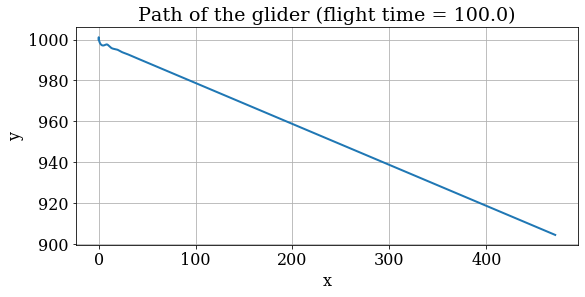

In [248]:
# Plot the path of the glider.
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);

## Grid convergence

Let's study the convergence of Euler's method for the phugoid model. In the previous lesson, when we studied the straight-line phugoid under a small perturbation, we looked at convergence by comparing the numerical solution with the exact solution. Unfortunately, most problems don't have an exact solution (that's why we compute in the first place!). But here's a neat thing: we can use numerical solutions computed on different grids to study the convergence of the method, even without an analytical solution.

We need to be careful, though, and make sure that the fine-grid solution is resolving all of the features in the mathematical model. How can we know this? We'll have a look at that in a bit. Let's see how this works first.

You need a sequence of numerical solutions of the same problem, each with a different number of time grid points.

Let's create a list of floats called `dt_values` that contains the time-step size of each grid to be solved on. For each element of `dt_values`, we will compute the solution `u` of the glider model using Euler's method and add it to the list `u_values` (initially empty).
If we want to use five different values of $\Delta t$, we'll have five elements in the list `u_values`, each element being a Numpy array. We'll have a list of Numpy arrays! How meta is that?

Read the code below carefully, and remember: you can get a help panel on any function by entering a question mark followed by the function name. For example, add a new code cell below and type:  `?numpy.empty`.

In [9]:
# Set the list of time-step sizes.
dt_values = [0.1, 0.05, 0.01, 0.005, 0.001]

# Create an empty list that will contain the solution of each grid.
u_values = []

for dt in dt_values:
    N = int(T / dt) + 1  # number of time-steps
    # Create array to store the solution at each time step.
    u = numpy.empty((N, 4))
    # Set the initial conditions.
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Temporal integration using Euler's method.
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution for the present time-step size
    u_values.append(u)

In [Lesson 2](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/01_phugoid/01_02_Phugoid_Oscillation.ipynb), we compared our numerical result to an analytical solution, but now we will instead compare numerical results from different grids. 

For each solution, we'll compute the difference relative to the finest grid. You will be tempted to call this an _"error"_, but be careful: the solution at the finest grid is _not the exact_ solution, it is just a reference value that we can use to estimate grid convergence.

To calculate the difference between one solution `u_current` and the solution at the finest grid, `u_finest`, we'll use the $L_1$-norm, but any norm will do.

There is a small problem with this, though.  The coarsest grid, where $\Delta t = 0.1$, has 1001 grid points, while the finest grid, with $\Delta t = 0.001$ has 100001 grid points.  How do we know which grid points correspond to the same location in two numerical solutions, in order to compare them?  

If we had time grids of 10 and 100 steps, respectively, this would be relatively simple to calculate.  Each element in our 10-step grid would span ten elements in our 100-step grid. 

Calculating the _ratio_ of the two grid sizes will tell us how many elements in our fine-grid will span over one element in our coarser grid.

Recall that we can _slice_ a NumPy array and grab a subset of values from it.  The syntax for that is

```Python
my_array[3:8]
```

An additional slicing trick that we can take advantage of is the "slice step size."  We add an additional `:` to the slice range and then specify how many steps to take between elements. For example, this code

```Python
my_array[3:8:2]
```

will return the values of `my_array[3]`, `my_array[5]` and `my_array[7]`

With that, we can write a function to obtain the differences between coarser and finest grids. Here we go ...

In [10]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as an array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as an array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solutions in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

Now that the function has been defined, let's compute the grid differences for each solution, relative to the fine-grid solution. Call the function `l1_diff()` with two solutions, one of which is always the one at the finest grid. Here's a neat Python trick: you can use negative indexing in Python!  If you have an array called `my_array` you access the _first_ element with

`my_array[0]`

But you can also access the _last_ element with 

`my_array[-1]`

and the next to last element with

`my_array[-2]`

and so on.  

In [ ]:
# Create an empty list to store the difference in the solution
# between two consecutive grids.
diff_values = []

for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(u_values[i][:, 2], u_values[-1][:, 2], dt)
    diff_values.append(diff)

Time to create a plot of the results! We'll create a *log-log* plot with the Matplotlib function [`loglog()`](https://matplotlib.org/api/pyplot_api.html?highlight=loglog#matplotlib.pyplot.loglog). Remember to skip the difference of the finest-grid solution with itself, which is zero.

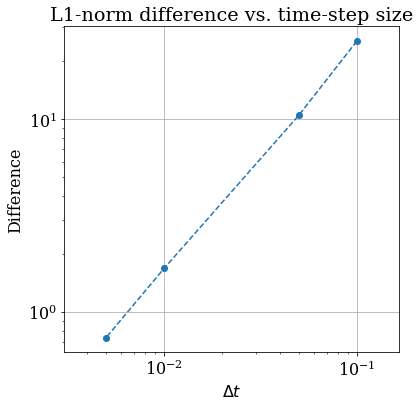

In [12]:
# Plot the difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm difference vs. time-step size')  # set the title
pyplot.xlabel('$\Delta t$')  # set the x-axis label
pyplot.ylabel('Difference')  # set the y-axis label
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values,
              color='C0', linestyle='--', marker='o')  # log-log plot
pyplot.axis('equal');  # make axes scale equally

### Order of convergence

The order of convergence is the rate at which the numerical solution approaches the exact one as the mesh is refined. Considering that we're not comparing with an exact solution, we use 3 grid resolutions that are refined at a constant ratio $r$ to find the *observed order of convergence* ($p$), which is given by:

$$
\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}
$$

where $f_1$ is the finest mesh solution, and $f_3$ the coarsest.  

In [13]:
r = 2  # refinement ratio for the time-step size
h = 0.001  # base grid size

dt_values2 = [h, r * h, r**2 * h]
u_values2 = []

for dt in dt_values2:
    N = int(T / dt) + 1  # number of time steps
    # Create array to store the solution at each time step.
    u = numpy.empty((N, 4))
    # Set initial conditions.
    u[0] = numpy.array([v0, theta0, x0, y0])
    # Time integration using Euler's method.
    for n in range(N - 1):
        u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    # Store the solution.
    u_values2.append(u)

# Calculate f2 - f1.
f2_f1 = l1_diff(u_values2[1][:, 2], u_values2[0][:, 2], dt_values2[1])
# Calculate f3 - f2.
f3_f2 = l1_diff(u_values2[2][:, 2], u_values2[1][:, 2], dt_values2[2])
# Calculate the observed order of convergence.
p = math.log(f3_f2 / f2_f1) / math.log(r)
print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 1.014


See how the observed order of convergence is close to 1? This means that the rate at which the grid differences decrease match the mesh-refinement ratio. We say that Euler's method is of *first order*, and this result is a consequence of that.

# Paper airplane challenge

Suppose you wanted to participate in a paper-airplane competition, and you want to use what you know about the phugoid model to improve your chances. For a given value of $L/D$ that you can obtain in your design, you want to know what is the best initial velocity and launch angle to fly the longest distance from a given height.

Using the phugoid model, write a new code to analyze the flight of a paper airplane, with the following conditions:

*  Assume $L/D$ of 5.0 (a value close to measurements in Feng et al. 2009)
*  For the trim velocity, let's take an average value of 4.9 m/s.
*  Find a combination of launch angle and velocity that gives the best distance.
*  Think about how you will know when the flight needs to stop ... this will influence how you organize the code.
*  How can you check if your answer is realistic?

In [252]:
# Set parameters.
g = 9.81  # gravitational acceleration (m.s^{-2})
vt = 4.9  # trim velocity (m.s)
CD = 1.0 / 5.0  # drag coefficient
CL = 1.0  # lift coefficient

# Set initial conditions.
v0 = vt  # start at the trim velocity
theta0 = 1.30  # trajectory angle
x0 = 0.0  # horizontal position
y0 = 100.0  # vertical position (altitude)

In [256]:
T = 120.0  # length of the time interval
dt = 0.01  # time-step size
N = int(T / dt) + 1  # number of time steps

# Create array to store the solution at each time step.
u = numpy.empty((N, 4))
# Set the initial conditions.
u[0] = numpy.array([v0, theta0, x0, y0])

# Time integration with Euler's method.
for n in range(N - 1):
    u[n + 1] = euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)
    print(n)
    print(u[n])

0
[  4.9   1.3   0.  100. ]
1
[4.78585494e+00 1.31466497e+00 1.31074426e-02 1.00047214e+02]
2
[4.67223867e+00 1.32902607e+00 2.52319283e-02 1.00093512e+02]
3
[4.55915341e+00 1.34308890e+00 3.64182850e-02 1.00138875e+02]
4
[4.44660033e+00 1.35685930e+00 4.67103332e-02 1.00183290e+02]
5
[4.33457967e+00 1.37034329e+00 5.61508575e-02 1.00226742e+02]
6
[4.22309071e+00 1.38354718e+00 6.47815827e-02 1.00269220e+02]
7
[4.11213187e+00 1.39647756e+00 7.26431545e-02 1.00310713e+02]
8
[4.00170072e+00 1.40914134e+00 7.97751236e-02 1.00351211e+02]
9
[3.89179405e+00 1.42154581e+00 8.62159345e-02 1.00390706e+02]
10
[3.78240790e+00 1.43369871e+00 9.20029163e-02 1.00429191e+02]
11
[3.67353760e+00 1.44560824e+00 9.71722783e-02 1.00466660e+02]
12
[  3.56517784   1.45728321   0.10175911 100.50310839]
13
[  3.45732269   1.46873307   0.10579737 100.53853072]
14
[  3.34996562   1.47996801   0.1093199  100.57292403]
15
[  3.24309961   1.49099914   0.11235843 100.6062856 ]
16
[  3.13671714   1.50183858   0.1149

[ 4.15308569  5.87781153  9.83004279 97.26846568]
305
[ 4.17767816  5.87307357  9.86820779 97.25208748]
306
[ 4.2025299   5.86860798  9.90652028 97.23543059]
307
[ 4.22761282  5.86441306  9.94498548 97.21850266]
308
[ 4.25289926  5.86048678  9.98360848 97.20131154]
309
[ 4.27836205  5.85682685 10.02239429 97.18386517]
310
[ 4.30397449  5.85343072 10.06134783 97.16617166]
311
[ 4.32971041  5.85029561 10.10047388 97.14823925]
312
[ 4.35554414  5.8474185  10.13977715 97.1300763 ]
313
[ 4.38145057  5.84479621 10.17926218 97.1116913 ]
314
[ 4.4074051   5.84242534 10.21893344 97.09309286]
315
[ 4.4333837   5.84030236 10.25879524 97.07428968]
316
[ 4.45936288  5.83842357 10.29885174 97.05529059]
317
[ 4.48531973  5.83678514 10.339107   97.0361045 ]
318
[ 4.5112319   5.83538314 10.3795649  97.01674042]
319
[ 4.53707758  5.8342135  10.42022919 96.99720744]
320
[ 4.56283557  5.83327209 10.46110344 96.97751474]
321
[ 4.58848519  5.83255468 10.50219108 96.95767154]
322
[ 4.61400637  5.83205697 10.

760
[ 4.81174831  6.06778351 31.50281084 92.48991082]
761
[ 4.81379657  6.06752688 31.54981635 92.47962619]
762
[ 4.81585331  6.06728822 31.59683924 92.46932512]
763
[ 4.81791674  6.0670675  31.64387975 92.45900842]
764
[ 4.81998507  6.0668647  31.69093814 92.44867691]
765
[ 4.82205655  6.06667977 31.73801464 92.43833141]
766
[ 4.82412942  6.06651265 31.78510945 92.42797276]
767
[ 4.82620196  6.06636327 31.83222277 92.41760179]
768
[ 4.82827247  6.06623153 31.87935479 92.40721932]
769
[ 4.83033927  6.06611735 31.92650565 92.39682618]
770
[ 4.83240069  6.06602059 31.97367552 92.38642321]
771
[ 4.83445511  6.06594115 32.0208645  92.37601123]
772
[ 4.8365009   6.06587887 32.06807272 92.36559108]
773
[ 4.8385365   6.0658336  32.11530027 92.35516357]
774
[ 4.84056034  6.06580518 32.16254722 92.34472954]
775
[ 4.84257089  6.06579343 32.20981364 92.3342898 ]
776
[ 4.84456666  6.06579816 32.25709957 92.32384517]
777
[ 4.84654618  6.06581918 32.30440503 92.31339645]
778
[ 4.84850801  6.06585626

[ 4.84650568  6.0847938  52.06952531 88.35096112]
1193
[ 4.84664652  6.08475129 52.11703972 88.34140902]
1194
[ 4.84679034  6.08471011 52.1645551  88.33185461]
1195
[ 4.84693697  6.08467026 52.2120715  88.32229797]
1196
[ 4.84708628  6.08463177 52.25958896 88.31273914]
1197
[ 4.8472381   6.08459466 52.30710751 88.30317819]
1198
[ 4.84739229  6.08455894 52.35462719 88.29361518]
1199
[ 4.8475487   6.08452462 52.40214805 88.28405017]
1200
[ 4.84770717  6.08449171 52.44967011 88.27448321]
1201
[ 4.84786754  6.08446024 52.49719341 88.26491438]
1202
[ 4.84802968  6.0844302  52.54471798 88.25534374]
1203
[ 4.84819341  6.08440161 52.59224385 88.24577135]
1204
[ 4.8483586   6.08437447 52.63977105 88.23619727]
1205
[ 4.84852509  6.08434879 52.68729962 88.22662158]
1206
[ 4.84869273  6.08432457 52.73482957 88.21704434]
1207
[ 4.84886137  6.08430182 52.78236093 88.20746562]
1208
[ 4.84903086  6.08428054 52.82989372 88.19788549]
1209
[ 4.84920106  6.08426073 52.87742797 88.18830401]
1210
[ 4.849371

1492
[ 4.85337881  6.0856213  66.34330678 85.49240704]
1493
[ 4.85338558  6.08563169 66.39089647 85.48288076]
1494
[ 4.85339129  6.08564209 66.43848632 85.47335497]
1495
[ 4.85339596  6.08565249 66.48607633 85.46382966]
1496
[ 4.8533996   6.0856629  66.53366649 85.45430483]
1497
[ 4.8534022   6.08567329 66.58125678 85.4447805 ]
1498
[ 4.85340379  6.08568366 66.6288472  85.43525665]
1499
[ 4.85340436  6.085694   66.67643773 85.42573329]
1500
[ 4.85340394  6.08570431 66.72402836 85.41621043]
1501
[ 4.85340252  6.08571457 66.77161909 85.40668805]
1502
[ 4.85340013  6.08572478 66.8192099  85.39716617]
1503
[ 4.85339678  6.08573493 66.86680078 85.38764478]
1504
[ 4.85339248  6.08574501 66.91439173 85.37812387]
1505
[ 4.85338724  6.08575502 66.96198274 85.36860346]
1506
[ 4.85338108  6.08576494 67.00957378 85.35908353]
1507
[ 4.85337401  6.08577478 67.05716486 85.34956409]
1508
[ 4.85336606  6.08578452 67.10475597 85.34004512]
1509
[ 4.85335723  6.08579415 67.15234709 85.33052664]
1510
[ 4.8

[ 4.85228811  6.08586104 79.66601364 82.82829   ]
1773
[ 4.85228047  6.08586157 79.71359492 82.81877727]
1774
[ 4.85227284  6.08586203 79.76117613 82.80926459]
1775
[ 4.85226522  6.08586242 79.80875727 82.79975194]
1776
[ 4.85225763  6.08586275 79.85633833 82.79023932]
1777
[ 4.85225007  6.08586302 79.90391933 82.78072673]
1778
[ 4.85224254  6.08586323 79.95150025 82.77121417]
1779
[ 4.85223505  6.08586337 79.9990811  82.76170164]
1780
[ 4.8522276   6.08586345 80.04666188 82.75218913]
1781
[ 4.85222021  6.08586347 80.09424259 82.74267663]
1782
[ 4.85221287  6.08586343 80.14182323 82.73316415]
1783
[ 4.8522056   6.08586333 80.18940379 82.72365169]
1784
[ 4.85219839  6.08586317 80.23698428 82.71413923]
1785
[ 4.85219126  6.08586295 80.2845647  82.70462678]
1786
[ 4.8521842   6.08586268 80.33214505 82.69511433]
1787
[ 4.85217723  6.08586235 80.37972532 82.68560189]
1788
[ 4.85217034  6.08586196 80.42730552 82.67608944]
1789
[ 4.85216354  6.08586152 80.47488565 82.66657699]
1790
[ 4.852156

2040
[ 4.85214241  6.08580197 92.417313   80.27813055]
2041
[ 4.85214161  6.08580154 92.46489228 80.2686153 ]
2042
[ 4.85214085  6.0858011  92.51247156 80.25910002]
2043
[ 4.85214015  6.08580066 92.56005082 80.24958473]
2044
[ 4.85213949  6.08580021 92.60763007 80.24006942]
2045
[ 4.85213888  6.08579976 92.65520932 80.23055409]
2046
[ 4.85213832  6.08579931 92.70278855 80.22103874]
2047
[ 4.8521378   6.08579885 92.75036777 80.21152337]
2048
[ 4.85213733  6.0857984  92.79794698 80.20200798]
2049
[ 4.85213691  6.08579794 92.84552619 80.19249257]
2050
[ 4.85213654  6.08579748 92.89310538 80.18297713]
2051
[ 4.85213622  6.08579701 92.94068457 80.17346168]
2052
[ 4.85213594  6.08579655 92.98826375 80.1639462 ]
2053
[ 4.85213571  6.08579609 93.03584292 80.1544307 ]
2054
[ 4.85213553  6.08579562 93.08342208 80.14491518]
2055
[ 4.85213539  6.08579516 93.13100124 80.13539964]
2056
[ 4.8521353   6.0857947  93.1785804  80.12588408]
2057
[ 4.85213525  6.08579423 93.22615954 80.11636849]
2058
[ 4.8

[  4.85217572   6.08579319 103.07513642  78.1465536 ]
2265
[  4.8521755    6.08579307 103.12271595  78.13703787]
2266
[  4.85217529   6.08579294 103.17029548  78.12752212]
2267
[  4.85217509   6.08579281 103.217875    78.11800638]
2268
[  4.85217491   6.08579268 103.26545452  78.10849063]
2269
[  4.85217474   6.08579255 103.31303404  78.09897487]
2270
[  4.85217459   6.08579242 103.36061355  78.0894591 ]
2271
[  4.85217445   6.08579229 103.40819306  78.07994333]
2272
[  4.85217432   6.08579216 103.45577257  78.07042756]
2273
[  4.85217421   6.08579203 103.50335208  78.06091178]
2274
[  4.85217411   6.08579189 103.55093158  78.05139599]
2275
[  4.85217403   6.08579176 103.59851109  78.04188019]
2276
[  4.85217396   6.08579163 103.64609059  78.03236439]
2277
[  4.8521739    6.08579149 103.69367008  78.02284859]
2278
[  4.85217385   6.08579136 103.74124958  78.01333277]
2279
[  4.85217382   6.08579123 103.78882907  78.00381695]
2280
[  4.8521738    6.08579109 103.83640857  77.99430113]
22

2511
[  4.85218499   6.08578985 114.82730056  75.79611779]
2512
[  4.85218501   6.08578981 114.87488015  75.78660188]
2513
[  4.85218504   6.08578978 114.92245974  75.77708597]
2514
[  4.85218507   6.08578974 114.97003933  75.76757005]
2515
[  4.85218511   6.0857897  115.01761892  75.75805413]
2516
[  4.85218515   6.08578967 115.06519851  75.74853821]
2517
[  4.85218519   6.08578964 115.1127781   75.73902229]
2518
[  4.85218523   6.0857896  115.16035769  75.72950637]
2519
[  4.85218528   6.08578957 115.20793728  75.71999044]
2520
[  4.85218533   6.08578953 115.25551687  75.71047452]
2521
[  4.85218538   6.0857895  115.30309646  75.70095859]
2522
[  4.85218544   6.08578947 115.35067605  75.69144266]
2523
[  4.8521855    6.08578944 115.39825564  75.68192673]
2524
[  4.85218556   6.08578941 115.44583523  75.67241079]
2525
[  4.85218562   6.08578938 115.49341482  75.66289486]
2526
[  4.85218568   6.08578935 115.54099441  75.65337892]
2527
[  4.85218575   6.08578932 115.588574    75.6438629

2748
[  4.85218831   6.08578964 126.10367258  73.54084185]
2749
[  4.85218833   6.08578964 126.1512522   73.53132592]
2750
[  4.85218834   6.08578963 126.19883182  73.52180999]
2751
[  4.85218836   6.08578962 126.24641144  73.51229406]
2752
[  4.85218839   6.08578961 126.29399106  73.50277813]
2753
[  4.85218841   6.0857896  126.34157068  73.4932622 ]
2754
[  4.85218843   6.0857896  126.3891503   73.48374627]
2755
[  4.85218845   6.08578959 126.43672992  73.47423034]
2756
[  4.85218847   6.08578958 126.48430954  73.4647144 ]
2757
[  4.8521885    6.08578957 126.53188916  73.45519847]
2758
[  4.85218852   6.08578957 126.57946878  73.44568254]
2759
[  4.85218855   6.08578956 126.6270484   73.43616661]
2760
[  4.85218857   6.08578955 126.67462802  73.42665067]
2761
[  4.8521886    6.08578955 126.72220764  73.41713474]
2762
[  4.85218862   6.08578954 126.76978727  73.4076188 ]
2763
[  4.85218865   6.08578954 126.81736689  73.39810287]
2764
[  4.85218867   6.08578953 126.86494651  73.3885869

[  4.8521893    6.08578975 146.61049379  69.43947706]
3180
[  4.8521893    6.08578975 146.65807342  69.42996114]
3181
[  4.8521893    6.08578975 146.70565305  69.42044521]
3182
[  4.8521893    6.08578975 146.75323268  69.41092929]
3183
[  4.8521893    6.08578975 146.80081231  69.40141336]
3184
[  4.8521893    6.08578975 146.84839194  69.39189743]
3185
[  4.8521893    6.08578975 146.89597158  69.38238151]
3186
[  4.8521893    6.08578975 146.94355121  69.37286558]
3187
[  4.8521893    6.08578974 146.99113084  69.36334965]
3188
[  4.85218931   6.08578974 147.03871047  69.35383373]
3189
[  4.85218931   6.08578974 147.0862901   69.3443178 ]
3190
[  4.85218931   6.08578974 147.13386973  69.33480188]
3191
[  4.85218931   6.08578974 147.18144936  69.32528595]
3192
[  4.85218931   6.08578974 147.22902899  69.31577002]
3193
[  4.85218931   6.08578974 147.27660862  69.3062541 ]
3194
[  4.85218931   6.08578974 147.32418825  69.29673817]
3195
[  4.85218931   6.08578974 147.37176788  69.28722224]
31

[  4.85218938   6.08578974 158.45782205  67.07001137]
3429
[  4.85218938   6.08578974 158.50540168  67.06049545]
3430
[  4.85218939   6.08578974 158.55298132  67.05097952]
3431
[  4.85218939   6.08578974 158.60056095  67.04146359]
3432
[  4.85218939   6.08578974 158.64814058  67.03194767]
3433
[  4.85218939   6.08578974 158.69572021  67.02243174]
3434
[  4.85218939   6.08578974 158.74329984  67.01291581]
3435
[  4.85218939   6.08578974 158.79087947  67.00339989]
3436
[  4.85218939   6.08578974 158.8384591   66.99388396]
3437
[  4.85218939   6.08578974 158.88603874  66.98436803]
3438
[  4.85218939   6.08578974 158.93361837  66.97485211]
3439
[  4.85218939   6.08578974 158.981198    66.96533618]
3440
[  4.85218939   6.08578974 159.02877763  66.95582025]
3441
[  4.85218939   6.08578974 159.07635726  66.94630433]
3442
[  4.85218939   6.08578974 159.12393689  66.9367884 ]
3443
[  4.85218939   6.08578974 159.17151652  66.92727247]
3444
[  4.85218939   6.08578974 159.21909616  66.91775655]
34

[  4.8521894    6.08578975 168.73502249  65.01457128]
3645
[  4.8521894    6.08578975 168.78260212  65.00505535]
3646
[  4.8521894    6.08578975 168.83018175  64.99553942]
3647
[  4.8521894    6.08578975 168.87776139  64.9860235 ]
3648
[  4.8521894    6.08578975 168.92534102  64.97650757]
3649
[  4.8521894    6.08578975 168.97292065  64.96699164]
3650
[  4.8521894    6.08578975 169.02050028  64.95747572]
3651
[  4.8521894    6.08578975 169.06807991  64.94795979]
3652
[  4.8521894    6.08578975 169.11565954  64.93844387]
3653
[  4.8521894    6.08578975 169.16323918  64.92892794]
3654
[  4.8521894    6.08578975 169.21081881  64.91941201]
3655
[  4.8521894    6.08578975 169.25839844  64.90989609]
3656
[  4.8521894    6.08578975 169.30597807  64.90038016]
3657
[  4.8521894    6.08578975 169.3535577   64.89086423]
3658
[  4.8521894    6.08578975 169.40113733  64.88134831]
3659
[  4.8521894    6.08578975 169.44871696  64.87183238]
3660
[  4.8521894    6.08578975 169.4962966   64.86231645]
36

3889
[  4.8521894    6.08578975 180.39203225  62.68316932]
3890
[  4.8521894    6.08578975 180.43961188  62.6736534 ]
3891
[  4.8521894    6.08578975 180.48719151  62.66413747]
3892
[  4.8521894    6.08578975 180.53477114  62.65462154]
3893
[  4.8521894    6.08578975 180.58235077  62.64510562]
3894
[  4.8521894    6.08578975 180.6299304   62.63558969]
3895
[  4.8521894    6.08578975 180.67751004  62.62607376]
3896
[  4.8521894    6.08578975 180.72508967  62.61655784]
3897
[  4.8521894    6.08578975 180.7726693   62.60704191]
3898
[  4.8521894    6.08578975 180.82024893  62.59752599]
3899
[  4.8521894    6.08578975 180.86782856  62.58801006]
3900
[  4.8521894    6.08578975 180.91540819  62.57849413]
3901
[  4.8521894    6.08578975 180.96298783  62.56897821]
3902
[  4.8521894    6.08578975 181.01056746  62.55946228]
3903
[  4.8521894    6.08578975 181.05814709  62.54994635]
3904
[  4.8521894    6.08578975 181.10572672  62.54043043]
3905
[  4.85218941   6.08578975 181.15330635  62.5309145

[  4.8521894    6.08578975 199.89968122  58.78163953]
4300
[  4.8521894    6.08578975 199.94726086  58.7721236 ]
4301
[  4.8521894    6.08578975 199.99484049  58.76260767]
4302
[  4.8521894    6.08578975 200.04242012  58.75309175]
4303
[  4.8521894    6.08578975 200.08999975  58.74357582]
4304
[  4.8521894    6.08578975 200.13757938  58.73405989]
4305
[  4.8521894    6.08578975 200.18515901  58.72454397]
4306
[  4.8521894    6.08578975 200.23273865  58.71502804]
4307
[  4.8521894    6.08578975 200.28031828  58.70551212]
4308
[  4.8521894    6.08578975 200.32789791  58.69599619]
4309
[  4.8521894    6.08578975 200.37547754  58.68648026]
4310
[  4.8521894    6.08578975 200.42305717  58.67696434]
4311
[  4.8521894    6.08578975 200.4706368   58.66744841]
4312
[  4.8521894    6.08578975 200.51821644  58.65793248]
4313
[  4.8521894    6.08578975 200.56579607  58.64841656]
4314
[  4.8521894    6.08578975 200.6133757   58.63890063]
4315
[  4.8521894    6.08578975 200.66095533  58.6293847 ]
43

[  4.85218941   6.08578975 215.6485393   55.63186791]
4631
[  4.85218941   6.08578975 215.69611893  55.62235198]
4632
[  4.85218941   6.08578975 215.74369857  55.61283606]
4633
[  4.85218941   6.08578975 215.7912782   55.60332013]
4634
[  4.85218941   6.08578975 215.83885783  55.5938042 ]
4635
[  4.85218941   6.08578975 215.88643746  55.58428828]
4636
[  4.85218941   6.08578975 215.93401709  55.57477235]
4637
[  4.85218941   6.08578975 215.98159672  55.56525643]
4638
[  4.85218941   6.08578975 216.02917636  55.5557405 ]
4639
[  4.85218941   6.08578975 216.07675599  55.54622457]
4640
[  4.85218941   6.08578975 216.12433562  55.53670865]
4641
[  4.85218941   6.08578975 216.17191525  55.52719272]
4642
[  4.85218941   6.08578975 216.21949488  55.51767679]
4643
[  4.85218941   6.08578975 216.26707451  55.50816087]
4644
[  4.85218941   6.08578975 216.31465415  55.49864494]
4645
[  4.85218941   6.08578975 216.36223378  55.48912902]
4646
[  4.85218941   6.08578975 216.40981341  55.47961309]
46

[  4.85218941   6.08578975 237.86822729  51.18793031]
5098
[  4.85218941   6.08578975 237.91580692  51.17841439]
5099
[  4.85218941   6.08578975 237.96338655  51.16889846]
5100
[  4.85218941   6.08578975 238.01096618  51.15938253]
5101
[  4.85218941   6.08578975 238.05854581  51.14986661]
5102
[  4.85218941   6.08578975 238.10612544  51.14035068]
5103
[  4.85218941   6.08578975 238.15370508  51.13083476]
5104
[  4.85218941   6.08578975 238.20128471  51.12131883]
5105
[  4.85218941   6.08578975 238.24886434  51.1118029 ]
5106
[  4.85218941   6.08578975 238.29644397  51.10228698]
5107
[  4.85218941   6.08578975 238.3440236   51.09277105]
5108
[  4.85218941   6.08578975 238.39160323  51.08325512]
5109
[  4.85218941   6.08578975 238.43918287  51.0737392 ]
5110
[  4.85218941   6.08578975 238.4867625   51.06422327]
5111
[  4.85218941   6.08578975 238.53434213  51.05470734]
5112
[  4.85218941   6.08578975 238.58192176  51.04519142]
5113
[  4.85218941   6.08578975 238.62950139  51.03567549]
51

[  4.85218941   6.08578975 258.80326521  47.00092273]
5538
[  4.85218941   6.08578975 258.85084485  46.9914068 ]
5539
[  4.85218941   6.08578975 258.89842448  46.98189088]
5540
[  4.85218941   6.08578975 258.94600411  46.97237495]
5541
[  4.85218941   6.08578975 258.99358374  46.96285902]
5542
[  4.85218941   6.08578975 259.04116337  46.9533431 ]
5543
[  4.85218941   6.08578975 259.088743    46.94382717]
5544
[  4.85218941   6.08578975 259.13632264  46.93431124]
5545
[  4.85218941   6.08578975 259.18390227  46.92479532]
5546
[  4.85218941   6.08578975 259.2314819   46.91527939]
5547
[  4.85218941   6.08578975 259.27906153  46.90576346]
5548
[  4.85218941   6.08578975 259.32664116  46.89624754]
5549
[  4.85218941   6.08578975 259.37422079  46.88673161]
5550
[  4.85218941   6.08578975 259.42180042  46.87721569]
5551
[  4.85218941   6.08578975 259.46938006  46.86769976]
5552
[  4.85218941   6.08578975 259.51695969  46.85818383]
5553
[  4.85218941   6.08578975 259.56453932  46.84866791]
55

[  4.85218941   6.08578975 273.31505287  44.0985652 ]
5843
[  4.85218941   6.08578975 273.3626325   44.08904927]
5844
[  4.85218941   6.08578975 273.41021213  44.07953334]
5845
[  4.85218941   6.08578975 273.45779176  44.07001742]
5846
[  4.85218941   6.08578975 273.50537139  44.06050149]
5847
[  4.85218941   6.08578975 273.55295103  44.05098557]
5848
[  4.85218941   6.08578975 273.60053066  44.04146964]
5849
[  4.85218941   6.08578975 273.64811029  44.03195371]
5850
[  4.85218941   6.08578975 273.69568992  44.02243779]
5851
[  4.85218941   6.08578975 273.74326955  44.01292186]
5852
[  4.85218941   6.08578975 273.79084918  44.00340593]
5853
[  4.85218941   6.08578975 273.83842882  43.99389001]
5854
[  4.85218941   6.08578975 273.88600845  43.98437408]
5855
[  4.85218941   6.08578975 273.93358808  43.97485815]
5856
[  4.85218941   6.08578975 273.98116771  43.96534223]
5857
[  4.85218941   6.08578975 274.02874734  43.9558263 ]
5858
[  4.85218941   6.08578975 274.07632697  43.94631038]
58

6262
[  4.85218941   6.08578975 293.29849816  40.10187614]
6263
[  4.85218941   6.08578975 293.34607779  40.09236021]
6264
[  4.85218941   6.08578975 293.39365743  40.08284429]
6265
[  4.85218941   6.08578975 293.44123706  40.07332836]
6266
[  4.85218941   6.08578975 293.48881669  40.06381243]
6267
[  4.85218941   6.08578975 293.53639632  40.05429651]
6268
[  4.85218941   6.08578975 293.58397595  40.04478058]
6269
[  4.85218941   6.08578975 293.63155558  40.03526465]
6270
[  4.85218941   6.08578975 293.67913522  40.02574873]
6271
[  4.85218941   6.08578975 293.72671485  40.0162328 ]
6272
[  4.85218941   6.08578975 293.77429448  40.00671687]
6273
[  4.85218941   6.08578975 293.82187411  39.99720095]
6274
[  4.85218941   6.08578975 293.86945374  39.98768502]
6275
[  4.85218941   6.08578975 293.91703337  39.9781691 ]
6276
[  4.85218941   6.08578975 293.96461301  39.96865317]
6277
[  4.85218941   6.08578975 294.01219264  39.95913724]
6278
[  4.85218941   6.08578975 294.05977227  39.9496213

[  4.85218941   6.08578975 314.9948102   35.76261373]
6719
[  4.85218941   6.08578975 315.04238983  35.7530978 ]
6720
[  4.85218941   6.08578975 315.08996946  35.74358188]
6721
[  4.85218941   6.08578975 315.13754909  35.73406595]
6722
[  4.85218941   6.08578975 315.18512872  35.72455003]
6723
[  4.85218941   6.08578975 315.23270836  35.7150341 ]
6724
[  4.85218941   6.08578975 315.28028799  35.70551817]
6725
[  4.85218941   6.08578975 315.32786762  35.69600225]
6726
[  4.85218941   6.08578975 315.37544725  35.68648632]
6727
[  4.85218941   6.08578975 315.42302688  35.67697039]
6728
[  4.85218941   6.08578975 315.47060651  35.66745447]
6729
[  4.85218941   6.08578975 315.51818615  35.65793854]
6730
[  4.85218941   6.08578975 315.56576578  35.64842262]
6731
[  4.85218941   6.08578975 315.61334541  35.63890669]
6732
[  4.85218941   6.08578975 315.66092504  35.62939076]
6733
[  4.85218941   6.08578975 315.70850467  35.61987484]
6734
[  4.85218941   6.08578975 315.7560843   35.61035891]
67

[  4.85218941   6.08578975 340.78297055  30.60498166]
7261
[  4.85218941   6.08578975 340.83055019  30.59546573]
7262
[  4.85218941   6.08578975 340.87812982  30.58594981]
7263
[  4.85218941   6.08578975 340.92570945  30.57643388]
7264
[  4.85218941   6.08578975 340.97328908  30.56691795]
7265
[  4.85218941   6.08578975 341.02086871  30.55740203]
7266
[  4.85218941   6.08578975 341.06844834  30.5478861 ]
7267
[  4.85218941   6.08578975 341.11602798  30.53837018]
7268
[  4.85218941   6.08578975 341.16360761  30.52885425]
7269
[  4.85218941   6.08578975 341.21118724  30.51933832]
7270
[  4.85218941   6.08578975 341.25876687  30.5098224 ]
7271
[  4.85218941   6.08578975 341.3063465   30.50030647]
7272
[  4.85218941   6.08578975 341.35392613  30.49079054]
7273
[  4.85218941   6.08578975 341.40150577  30.48127462]
7274
[  4.85218941   6.08578975 341.4490854   30.47175869]
7275
[  4.85218941   6.08578975 341.49666503  30.46224276]
7276
[  4.85218941   6.08578975 341.54424466  30.45272684]
72

[  4.85218941   6.08578975 365.19132159  25.72331145]
7774
[  4.85218941   6.08578975 365.23890123  25.71379553]
7775
[  4.85218941   6.08578975 365.28648086  25.7042796 ]
7776
[  4.85218941   6.08578975 365.33406049  25.69476367]
7777
[  4.85218941   6.08578975 365.38164012  25.68524775]
7778
[  4.85218941   6.08578975 365.42921975  25.67573182]
7779
[  4.85218941   6.08578975 365.47679938  25.66621589]
7780
[  4.85218941   6.08578975 365.52437901  25.65669997]
7781
[  4.85218941   6.08578975 365.57195865  25.64718404]
7782
[  4.85218941   6.08578975 365.61953828  25.63766812]
7783
[  4.85218941   6.08578975 365.66711791  25.62815219]
7784
[  4.85218941   6.08578975 365.71469754  25.61863626]
7785
[  4.85218941   6.08578975 365.76227717  25.60912034]
7786
[  4.85218941   6.08578975 365.8098568   25.59960441]
7787
[  4.85218941   6.08578975 365.85743644  25.59008848]
7788
[  4.85218941   6.08578975 365.90501607  25.58057256]
7789
[  4.85218941   6.08578975 365.9525957   25.57105663]
77

8151
[  4.85218941   6.08578975 383.17642236  22.1262913 ]
8152
[  4.85218941   6.08578975 383.22400199  22.11677537]
8153
[  4.85218941   6.08578975 383.27158162  22.10725945]
8154
[  4.85218941   6.08578975 383.31916125  22.09774352]
8155
[  4.85218941   6.08578975 383.36674089  22.08822759]
8156
[  4.85218941   6.08578975 383.41432052  22.07871167]
8157
[  4.85218941   6.08578975 383.46190015  22.06919574]
8158
[  4.85218941   6.08578975 383.50947978  22.05967981]
8159
[  4.85218941   6.08578975 383.55705941  22.05016389]
8160
[  4.85218941   6.08578975 383.60463904  22.04064796]
8161
[  4.85218941   6.08578975 383.65221868  22.03113204]
8162
[  4.85218941   6.08578975 383.69979831  22.02161611]
8163
[  4.85218941   6.08578975 383.74737794  22.01210018]
8164
[  4.85218941   6.08578975 383.79495757  22.00258426]
8165
[  4.85218941   6.08578975 383.8425372   21.99306833]
8166
[  4.85218941   6.08578975 383.89011683  21.9835524 ]
8167
[  4.85218941   6.08578975 383.93769647  21.9740364

[  4.85218941   6.08578975 399.06801933  18.9479719 ]
8486
[  4.85218941   6.08578975 399.11559896  18.93845598]
8487
[  4.85218941   6.08578975 399.16317859  18.92894005]
8488
[  4.85218941   6.08578975 399.21075823  18.91942413]
8489
[  4.85218941   6.08578975 399.25833786  18.9099082 ]
8490
[  4.85218941   6.08578975 399.30591749  18.90039227]
8491
[  4.85218941   6.08578975 399.35349712  18.89087635]
8492
[  4.85218941   6.08578975 399.40107675  18.88136042]
8493
[  4.85218941   6.08578975 399.44865638  18.87184449]
8494
[  4.85218941   6.08578975 399.49623602  18.86232857]
8495
[  4.85218941   6.08578975 399.54381565  18.85281264]
8496
[  4.85218941   6.08578975 399.59139528  18.84329671]
8497
[  4.85218941   6.08578975 399.63897491  18.83378079]
8498
[  4.85218941   6.08578975 399.68655454  18.82426486]
8499
[  4.85218941   6.08578975 399.73413417  18.81474894]
8500
[  4.85218941   6.08578975 399.78171381  18.80523301]
8501
[  4.85218941   6.08578975 399.82929344  18.79571708]
85

[  4.85218941   6.08578975 410.20165314  16.72124514]
8720
[  4.85218941   6.08578975 410.24923277  16.71172922]
8721
[  4.85218941   6.08578975 410.2968124   16.70221329]
8722
[  4.85218941   6.08578975 410.34439203  16.69269736]
8723
[  4.85218941   6.08578975 410.39197167  16.68318144]
8724
[  4.85218941   6.08578975 410.4395513   16.67366551]
8725
[  4.85218941   6.08578975 410.48713093  16.66414958]
8726
[  4.85218941   6.08578975 410.53471056  16.65463366]
8727
[  4.85218941   6.08578975 410.58229019  16.64511773]
8728
[  4.85218941   6.08578975 410.62986982  16.63560181]
8729
[  4.85218941   6.08578975 410.67744946  16.62608588]
8730
[  4.85218941   6.08578975 410.72502909  16.61656995]
8731
[  4.85218941   6.08578975 410.77260872  16.60705403]
8732
[  4.85218941   6.08578975 410.82018835  16.5975381 ]
8733
[  4.85218941   6.08578975 410.86776798  16.58802217]
8734
[  4.85218941   6.08578975 410.91534761  16.57850625]
8735
[  4.85218941   6.08578975 410.96292725  16.56899032]
87

[  4.85218941   6.08578975 424.66586116  13.82840354]
9024
[  4.85218941   6.08578975 424.71344079  13.81888761]
9025
[  4.85218941   6.08578975 424.76102043  13.80937169]
9026
[  4.85218941   6.08578975 424.80860006  13.79985576]
9027
[  4.85218941   6.08578975 424.85617969  13.79033983]
9028
[  4.85218941   6.08578975 424.90375932  13.78082391]
9029
[  4.85218941   6.08578975 424.95133895  13.77130798]
9030
[  4.85218941   6.08578975 424.99891858  13.76179205]
9031
[  4.85218941   6.08578975 425.04649821  13.75227613]
9032
[  4.85218941   6.08578975 425.09407785  13.7427602 ]
9033
[  4.85218941   6.08578975 425.14165748  13.73324428]
9034
[  4.85218941   6.08578975 425.18923711  13.72372835]
9035
[  4.85218941   6.08578975 425.23681674  13.71421242]
9036
[  4.85218941   6.08578975 425.28439637  13.7046965 ]
9037
[  4.85218941   6.08578975 425.331976    13.69518057]
9038
[  4.85218941   6.08578975 425.37955564  13.68566464]
9039
[  4.85218941   6.08578975 425.42713527  13.67614872]
90

[  4.85218941   6.08578975 438.93975066  10.97362564]
9324
[  4.85218941   6.08578975 438.98733029  10.96410971]
9325
[  4.85218941   6.08578975 439.03490992  10.95459379]
9326
[  4.85218941   6.08578975 439.08248955  10.94507786]
9327
[  4.85218941   6.08578975 439.13006918  10.93556193]
9328
[  4.85218941   6.08578975 439.17764882  10.92604601]
9329
[  4.85218941   6.08578975 439.22522845  10.91653008]
9330
[  4.85218941   6.08578975 439.27280808  10.90701415]
9331
[  4.85218941   6.08578975 439.32038771  10.89749823]
9332
[  4.85218941   6.08578975 439.36796734  10.8879823 ]
9333
[  4.85218941   6.08578975 439.41554697  10.87846638]
9334
[  4.85218941   6.08578975 439.46312661  10.86895045]
9335
[  4.85218941   6.08578975 439.51070624  10.85943452]
9336
[  4.85218941   6.08578975 439.55828587  10.8499186 ]
9337
[  4.85218941   6.08578975 439.6058655   10.84040267]
9338
[  4.85218941   6.08578975 439.65344513  10.83088674]
9339
[  4.85218941   6.08578975 439.70102476  10.82137082]
93

9544
[  4.85218941   6.08578975 449.45484925   8.87060592]
9545
[  4.85218941   6.08578975 449.50242889   8.86108999]
9546
[  4.85218941   6.08578975 449.55000852   8.85157407]
9547
[  4.85218941   6.08578975 449.59758815   8.84205814]
9548
[  4.85218941   6.08578975 449.64516778   8.83254221]
9549
[  4.85218941   6.08578975 449.69274741   8.82302629]
9550
[  4.85218941   6.08578975 449.74032704   8.81351036]
9551
[  4.85218941   6.08578975 449.78790668   8.80399444]
9552
[  4.85218941   6.08578975 449.83548631   8.79447851]
9553
[  4.85218941   6.08578975 449.88306594   8.78496258]
9554
[  4.85218941   6.08578975 449.93064557   8.77544666]
9555
[  4.85218941   6.08578975 449.9782252    8.76593073]
9556
[  4.85218941   6.08578975 450.02580483   8.7564148 ]
9557
[  4.85218941   6.08578975 450.07338447   8.74689888]
9558
[  4.85218941   6.08578975 450.1209641    8.73738295]
9559
[  4.85218941   6.08578975 450.16854373   8.72786702]
9560
[  4.85218941   6.08578975 450.21612336   8.7183511

[  4.85218941   6.08578975 461.44491643   6.47259248]
9797
[  4.85218941   6.08578975 461.49249606   6.46307656]
9798
[  4.85218941   6.08578975 461.54007569   6.45356063]
9799
[  4.85218941   6.08578975 461.58765533   6.44404471]
9800
[  4.85218941   6.08578975 461.63523496   6.43452878]
9801
[  4.85218941   6.08578975 461.68281459   6.42501285]
9802
[  4.85218941   6.08578975 461.73039422   6.41549693]
9803
[  4.85218941   6.08578975 461.77797385   6.405981  ]
9804
[  4.85218941   6.08578975 461.82555348   6.39646507]
9805
[  4.85218941   6.08578975 461.87313312   6.38694915]
9806
[  4.85218941   6.08578975 461.92071275   6.37743322]
9807
[  4.85218941   6.08578975 461.96829238   6.36791729]
9808
[  4.85218941   6.08578975 462.01587201   6.35840137]
9809
[  4.85218941   6.08578975 462.06345164   6.34888544]
9810
[  4.85218941   6.08578975 462.11103127   6.33936952]
9811
[  4.85218941   6.08578975 462.15861091   6.32985359]
9812
[  4.85218941   6.08578975 462.20619054   6.32033766]
98

10089
[  4.85218941   6.08578975 475.38574851   3.68442607]
10090
[  4.85218941   6.08578975 475.43332814   3.67491014]
10091
[  4.85218941   6.08578975 475.48090777   3.66539422]
10092
[  4.85218941   6.08578975 475.5284874    3.65587829]
10093
[  4.85218941   6.08578975 475.57606703   3.64636236]
10094
[  4.85218941   6.08578975 475.62364666   3.63684644]
10095
[  4.85218941   6.08578975 475.6712263    3.62733051]
10096
[  4.85218941   6.08578975 475.71880593   3.61781459]
10097
[  4.85218941   6.08578975 475.76638556   3.60829866]
10098
[  4.85218941   6.08578975 475.81396519   3.59878273]
10099
[  4.85218941   6.08578975 475.86154482   3.58926681]
10100
[  4.85218941   6.08578975 475.90912445   3.57975088]
10101
[  4.85218941   6.08578975 475.95670409   3.57023495]
10102
[  4.85218941   6.08578975 476.00428372   3.56071903]
10103
[  4.85218941   6.08578975 476.05186335   3.5512031 ]
10104
[  4.85218941   6.08578975 476.09944298   3.54168717]
10105
[  4.85218941   6.08578975 476.147

[  4.85218941   6.08578975 483.66460441   2.02865489]
10264
[  4.85218941   6.08578975 483.71218405   2.01913896]
10265
[  4.85218941   6.08578975 483.75976368   2.00962304]
10266
[  4.85218941   6.08578975 483.80734331   2.00010711]
10267
[  4.85218941   6.08578975 483.85492294   1.99059118]
10268
[  4.85218941   6.08578975 483.90250257   1.98107526]
10269
[  4.85218941   6.08578975 483.9500822    1.97155933]
10270
[  4.85218941   6.08578975 483.99766184   1.9620434 ]
10271
[  4.85218941   6.08578975 484.04524147   1.95252748]
10272
[  4.85218941   6.08578975 484.0928211    1.94301155]
10273
[  4.85218941   6.08578975 484.14040073   1.93349562]
10274
[  4.85218941   6.08578975 484.18798036   1.9239797 ]
10275
[  4.85218941   6.08578975 484.23555999   1.91446377]
10276
[  4.85218941   6.08578975 484.28313963   1.90494785]
10277
[  4.85218941   6.08578975 484.33071926   1.89543192]
10278
[  4.85218941   6.08578975 484.37829889   1.88591599]
10279
[  4.85218941   6.08578975 484.42587852 

[4.85218941e+00 6.08578975e+00 4.92895053e+02 1.82565180e-01]
10458
[4.85218941e+00 6.08578975e+00 4.92942633e+02 1.73049253e-01]
10459
[4.85218941e+00 6.08578975e+00 4.92990212e+02 1.63533327e-01]
10460
[4.85218941e+00 6.08578975e+00 4.93037792e+02 1.54017401e-01]
10461
[4.85218941e+00 6.08578975e+00 4.93085371e+02 1.44501474e-01]
10462
[4.85218941e+00 6.08578975e+00 4.93132951e+02 1.34985548e-01]
10463
[4.85218941e+00 6.08578975e+00 4.93180531e+02 1.25469622e-01]
10464
[4.85218941e+00 6.08578975e+00 4.93228110e+02 1.15953695e-01]
10465
[4.85218941e+00 6.08578975e+00 4.93275690e+02 1.06437769e-01]
10466
[4.85218941e+00 6.08578975e+00 4.93323270e+02 9.69218428e-02]
10467
[4.85218941e+00 6.08578975e+00 4.93370849e+02 8.74059165e-02]
10468
[4.85218941e+00 6.08578975e+00 4.93418429e+02 7.78899901e-02]
10469
[4.85218941e+00 6.08578975e+00 4.93466009e+02 6.83740638e-02]
10470
[4.85218941e+00 6.08578975e+00 4.93513588e+02 5.88581375e-02]
10471
[4.85218941e+00 6.08578975e+00 4.93561168e+02 4.

10716
[  4.85218941   6.08578975 505.21817755  -2.28205974]
10717
[  4.85218941   6.08578975 505.26575718  -2.29157567]
10718
[  4.85218941   6.08578975 505.31333682  -2.30109159]
10719
[  4.85218941   6.08578975 505.36091645  -2.31060752]
10720
[  4.85218941   6.08578975 505.40849608  -2.32012345]
10721
[  4.85218941   6.08578975 505.45607571  -2.32963937]
10722
[  4.85218941   6.08578975 505.50365534  -2.3391553 ]
10723
[  4.85218941   6.08578975 505.55123497  -2.34867122]
10724
[  4.85218941   6.08578975 505.59881461  -2.35818715]
10725
[  4.85218941   6.08578975 505.64639424  -2.36770308]
10726
[  4.85218941   6.08578975 505.69397387  -2.377219  ]
10727
[  4.85218941   6.08578975 505.7415535   -2.38673493]
10728
[  4.85218941   6.08578975 505.78913313  -2.39625086]
10729
[  4.85218941   6.08578975 505.83671276  -2.40576678]
10730
[  4.85218941   6.08578975 505.8842924   -2.41528271]
10731
[  4.85218941   6.08578975 505.93187203  -2.42479863]
10732
[  4.85218941   6.08578975 505.979

[  4.85218941   6.08578975 528.19913964  -6.87825216]
11200
[  4.85218941   6.08578975 528.24671927  -6.88776808]
11201
[  4.85218941   6.08578975 528.29429891  -6.89728401]
11202
[  4.85218941   6.08578975 528.34187854  -6.90679994]
11203
[  4.85218941   6.08578975 528.38945817  -6.91631586]
11204
[  4.85218941   6.08578975 528.4370378   -6.92583179]
11205
[  4.85218941   6.08578975 528.48461743  -6.93534772]
11206
[  4.85218941   6.08578975 528.53219706  -6.94486364]
11207
[  4.85218941   6.08578975 528.5797767   -6.95437957]
11208
[  4.85218941   6.08578975 528.62735633  -6.96389549]
11209
[  4.85218941   6.08578975 528.67493596  -6.97341142]
11210
[  4.85218941   6.08578975 528.72251559  -6.98292735]
11211
[  4.85218941   6.08578975 528.77009522  -6.99244327]
11212
[  4.85218941   6.08578975 528.81767485  -7.0019592 ]
11213
[  4.85218941   6.08578975 528.86525449  -7.01147513]
11214
[  4.85218941   6.08578975 528.91283412  -7.02099105]
11215
[  4.85218941   6.08578975 528.96041375 

[  4.85218941   6.08578975 543.04398472  -9.84722117]
11512
[  4.85218941   6.08578975 543.09156435  -9.8567371 ]
11513
[  4.85218941   6.08578975 543.13914398  -9.86625303]
11514
[  4.85218941   6.08578975 543.18672361  -9.87576895]
11515
[  4.85218941   6.08578975 543.23430325  -9.88528488]
11516
[  4.85218941   6.08578975 543.28188288  -9.8948008 ]
11517
[  4.85218941   6.08578975 543.32946251  -9.90431673]
11518
[  4.85218941   6.08578975 543.37704214  -9.91383266]
11519
[  4.85218941   6.08578975 543.42462177  -9.92334858]
11520
[  4.85218941   6.08578975 543.4722014   -9.93286451]
11521
[  4.85218941   6.08578975 543.51978104  -9.94238044]
11522
[  4.85218941   6.08578975 543.56736067  -9.95189636]
11523
[  4.85218941   6.08578975 543.6149403   -9.96141229]
11524
[  4.85218941   6.08578975 543.66251993  -9.97092822]
11525
[  4.85218941   6.08578975 543.71009956  -9.98044414]
11526
[  4.85218941   6.08578975 543.75767919  -9.98996007]
11527
[  4.85218941   6.08578975 543.80525883 

11828
[  4.85218941   6.08578975 558.12672795 -12.86376982]
11829
[  4.85218941   6.08578975 558.17430758 -12.87328575]
11830
[  4.85218941   6.08578975 558.22188722 -12.88280167]
11831
[  4.85218941   6.08578975 558.26946685 -12.8923176 ]
11832
[  4.85218941   6.08578975 558.31704648 -12.90183353]
11833
[  4.85218941   6.08578975 558.36462611 -12.91134945]
11834
[  4.85218941   6.08578975 558.41220574 -12.92086538]
11835
[  4.85218941   6.08578975 558.45978537 -12.9303813 ]
11836
[  4.85218941   6.08578975 558.50736501 -12.93989723]
11837
[  4.85218941   6.08578975 558.55494464 -12.94941316]
11838
[  4.85218941   6.08578975 558.60252427 -12.95892908]
11839
[  4.85218941   6.08578975 558.6501039  -12.96844501]
11840
[  4.85218941   6.08578975 558.69768353 -12.97796094]
11841
[  4.85218941   6.08578975 558.74526316 -12.98747686]
11842
[  4.85218941   6.08578975 558.7928428  -12.99699279]
11843
[  4.85218941   6.08578975 558.84042243 -13.00650871]
11844
[  4.85218941   6.08578975 558.888

In [269]:
dt=0.01
def x_final(v0, theta0,x0,y0):
    u=numpy.array([v0,theta0,x0,y0],ndmin=2)
    n=0
    while u[-1,3]>0 :
        u=numpy.append(u,[euler_step(u[n], rhs_phugoid, dt, CL, CD, g, vt)], axis=0)
        n=n+1
    i=0
    while u[-(1+i),2]<0 :
        i=i+1
    return (u[-(1+i),2])

In [282]:
theta0=numpy.linspace(-numpy.pi/2,numpy.pi/2,90)
v0=numpy.linspace(0.1,20,20)
xmax=0.
best_values=(0,0,0)
for i in range(len(v0)):
    
    for n in range(len(theta0)):
        x_f=x_final(v0[-(1+i)],theta0[n],x0,y0)
        print (20-i,n)
        if x_f>xmax :
            xmax=x_f
            best_values=(v0[-(1+i)],theta0[n],x_f)
            print(best_values)

20 0
(20.0, -1.5707963267948966, 496.95076064956163)
20 1
(20.0, -1.535497532934337, 497.4011619207568)
20 2
(20.0, -1.5001987390737777, 497.8012095743155)
20 3
(20.0, -1.464899945213218, 498.2460442708924)
20 4
(20.0, -1.4296011513526587, 498.6404923101467)
20 5
(20.0, -1.3943023574920992, 499.0797026962749)
20 6
(20.0, -1.3590035636315396, 499.5160897230493)
20 7
(20.0, -1.3237047697709803, 499.90207186936277)
20 8
(20.0, -1.2884059759104207, 500.28523105674856)
20 9
(20.0, -1.2531071820498614, 500.71315337358226)
20 10
(20.0, -1.2178083881893018, 501.0906901606096)
20 11
(20.0, -1.1825095943287423, 501.46543577407203)
20 12
(20.0, -1.147210800468183, 501.8849886563568)
20 13
(20.0, -1.1119120066076233, 502.2542123988509)
20 14
(20.0, -1.076613212747064, 502.62071348167393)
20 15
(20.0, -1.0413144188865044, 502.93694305704014)
20 16
(20.0, -1.0060156250259449, 503.29809504087746)
20 17
(20.0, -0.9707168311653855, 503.6090486162132)
20 18
(20.0, -0.9354180373048261, 503.96500520300606

10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
10 80
10 81
10 82
10 83
10 84
10 85
10 86
10 87
10 88
10 89
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
9 31
9 32
9 33
9 34
9 35
9 36
9 37
9 38
9 39
9 40
9 41
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9 49
9 50
9 51
9 52
9 53
9 54
9 55
9 56
9 57
9 58
9 59
9 60
9 61
9 62
9 63
9 64
9 65
9 66
9 67
9 68
9 69
9 70
9 71
9 72
9 73
9 74
9 75
9 76
9 77
9 78
9 79
9 80
9 81
9 82
9 83
9 84
9 85
9 86
9 87
9 88
9 89
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65


566.3104245977131


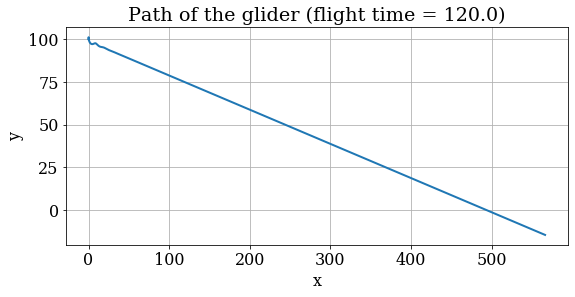

In [257]:
x=u[:,2]
y=u[:,3]
# Plot the path of the glider.
pyplot.figure(figsize=(9.0, 4.0))
pyplot.title('Path of the glider (flight time = {})'.format(T))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.grid()
pyplot.plot(x, y, color='C0', linestyle='-', linewidth=2);
print(u[-1,2])

## References

* Feng, N. B. et al. _"On the aerodynamics of paper airplanes"_, AIAA paper 2009-3958, 27th AIAA Applied Aerodynamics Conference, San Antonio, TX. [PDF](http://arc.aiaa.org/doi/abs/10.2514/6.2009-3958)

* Simanca, S. R. and Sutherland, S. _"Mathematical problem-solving with computers,"_ 2002 course notes, Stony Brook University, chapter 3: [The Art of Phugoid](https://www.math.sunysb.edu/~scott/Book331/Art_Phugoid.html). (Note that there is an error in the figure: sine and cosine are switched.)

---

###### The cell below loads the style of the notebook.

In [14]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())